### Тема “Классификация текста”

В качестве заготовки для задания прогоним часть 2ого домашнего задания. Нам необходимо получить разреженные матрицы, используя CountVectorizer, TfidfVectorizer для 'tweet_stemmed' и 'tweet_lemmatized' столбцов (4 матрицы).

In [1]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import numpy as np

In [2]:
combine_df = pd.read_pickle("./combine_df.pkl")
combine_df.head()

,id,label,tweet,tweet_token,tweet_token_filtered,tweet_stemmed,tweet_lemmatized
0,1,0.0,when father is dysfunctional and is so selfish...,"[when, father, is, dysfunctional, and, is, so,...","[father, dysfunctional, selfish, drags, kids, ...","[father, dysfunct, selfish, drag, kid, dysfunc...","[father, dysfunctional, selfish, drag, kid, dy..."
1,2,0.0,thanks for lyft credit cannot use cause they d...,"[thanks, for, lyft, credit, can, not, use, cau...","[thanks, lyft, credit, use, cause, offer, whee...","[thank, lyft, credit, use, caus, offer, wheelc...","[thank, lyft, credit, use, cause, offer, wheel..."
2,3,0.0,bihday your majesty,"[bihday, your, majesty]","[bihday, majesty]","[bihday, majesti]","[bihday, majesty]"
3,4,0.0,model love you take with you all the time in ur,"[model, love, you, take, with, you, all, the, ...","[model, love, take, time, ur]","[model, love, take, time, ur]","[model, love, take, time, ur]"
4,5,0.0,factsguide society now motivation,"[factsguide, society, now, motivation]","[factsguide, society, motivation]","[factsguid, societi, motiv]","[factsguide, society, motivation]"


In [3]:
combine_df['tweet_stemmed'][0]

['father', 'dysfunct', 'selfish', 'drag', 'kid', 'dysfunct', 'run']

In [4]:
combine_df['tweet_stemmed2']=combine_df['tweet_stemmed'].apply(lambda x: " ".join(x) )
combine_df['tweet_lemmatized2']=combine_df['tweet_lemmatized'].apply(lambda x: " ".join(x) )
combine_df.head()

,id,label,tweet,tweet_token,tweet_token_filtered,tweet_stemmed,tweet_lemmatized,tweet_stemmed2,tweet_lemmatized2
0,1,0.0,when father is dysfunctional and is so selfish...,"[when, father, is, dysfunctional, and, is, so,...","[father, dysfunctional, selfish, drags, kids, ...","[father, dysfunct, selfish, drag, kid, dysfunc...","[father, dysfunctional, selfish, drag, kid, dy...",father dysfunct selfish drag kid dysfunct run,father dysfunctional selfish drag kid dysfunct...
1,2,0.0,thanks for lyft credit cannot use cause they d...,"[thanks, for, lyft, credit, can, not, use, cau...","[thanks, lyft, credit, use, cause, offer, whee...","[thank, lyft, credit, use, caus, offer, wheelc...","[thank, lyft, credit, use, cause, offer, wheel...",thank lyft credit use caus offer wheelchair va...,thank lyft credit use cause offer wheelchair v...
2,3,0.0,bihday your majesty,"[bihday, your, majesty]","[bihday, majesty]","[bihday, majesti]","[bihday, majesty]",bihday majesti,bihday majesty
3,4,0.0,model love you take with you all the time in ur,"[model, love, you, take, with, you, all, the, ...","[model, love, take, time, ur]","[model, love, take, time, ur]","[model, love, take, time, ur]",model love take time ur,model love take time ur
4,5,0.0,factsguide society now motivation,"[factsguide, society, now, motivation]","[factsguide, society, motivation]","[factsguid, societi, motiv]","[factsguide, society, motivation]",factsguid societi motiv,factsguide society motivation


In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer

__Задание 1.__
Построим модель LogisticRegression, используя Bag-of-Words признаки для столбца combine_df['tweet_stemmed']. 
* Поделим Bag-of-Words признаки на train, test (train заканчивается на 31962 строке combine_df)
* Ответами является столбец train_df['label']
* Рассчитаем predict_proba, приведем prediction в в бинарный вид: если предсказание >= 0.3 то 1, иначе 0, тип заменим на int
* Рассчитаем f1_score 

Повторим аналогично для столбца combine_df['tweet_lemmatized'].

In [48]:
from sklearn.metrics import f1_score
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression

In [33]:
combine_df.iloc[31962:,:]['label']

31961    0.0
31962    NaN
31963    NaN
31964    NaN
31965    NaN
        ... 
49154    NaN
49155    NaN
49156    NaN
49157    NaN
49158    NaN
Name: label, Length: 17198, dtype: float64

In [38]:
df = combine_df.iloc[:31962,:]
train_x, valid_x, train_y, valid_y = model_selection.train_test_split(df['tweet_stemmed2'], df['label'])
print("train_x={} , valid_x={}, train_y={}, valid_y={} ".format(train_x.shape, valid_x.shape, train_y.shape, valid_y.shape)) 

train_x=(23971,) , valid_x=(7991,), train_y=(23971,), valid_y=(7991,) 


In [39]:
count_vectorizer = CountVectorizer(ngram_range=(1, 2), stop_words='english', analyzer='word', binary=False,max_df=0.9, max_features=1000)

train_cv_stem = count_vectorizer.fit_transform(train_x)
valid_cv_stem = count_vectorizer.transform(valid_x)

print("Shape train and valid - {} , {}".format(train_cv_stem.shape, valid_cv_stem.shape)) 

Shape train and valid - (23971, 1000) , (7991, 1000)


In [46]:
# Linear Classifier на Count Vectors
lgr = LogisticRegression()
lgr.fit(train_cv_stem.toarray(), train_y)

LogisticRegression()

In [57]:
y_pred = lgr.predict_proba(valid_cv_stem)

In [58]:
y_pred.shape

(7991, 2)

In [79]:
y1_pred = [1 if x>=0.3 else 0 for x in y_pred[:,0]]

In [80]:
lgr.classes_

array([0., 1.])

In [81]:
f1_score(valid_y, y1_pred)

0.10378481313972863

какой то очень маленький скор, не покидает ощущение, что что сделала не так, но что именно непонятно

Повторим аналогично для столбца combine_df['tweet_lemmatized'].

In [82]:
train_x, valid_x, train_y, valid_y = model_selection.train_test_split(df['tweet_lemmatized2'], df['label'])
print("train_x={} , valid_x={}, train_y={}, valid_y={} ".format(train_x.shape, valid_x.shape, train_y.shape, valid_y.shape)) 

train_x=(23971,) , valid_x=(7991,), train_y=(23971,), valid_y=(7991,) 


In [83]:
count_vectorizer = CountVectorizer(ngram_range=(1, 2), stop_words='english', analyzer='word', binary=False,max_df=0.9, max_features=1000)

train_cv_stem = count_vectorizer.fit_transform(train_x)
valid_cv_stem = count_vectorizer.transform(valid_x)

print("Shape train and valid - {} , {}".format(train_cv_stem.shape, valid_cv_stem.shape)) 

Shape train and valid - (23971, 1000) , (7991, 1000)


In [84]:
# Linear Classifier на Count Vectors
lgr = LogisticRegression()
lgr.fit(train_cv_stem.toarray(), train_y)

LogisticRegression()

In [85]:
y_pred = lgr.predict_proba(valid_cv_stem)
y1_pred = [1 if x>=0.3 else 0 for x in y_pred[:,0]]
f1_score(valid_y, y1_pred)

0.10060793896769579

__Задание 2.__
Построим модель LogisticRegression, используя TF-IDF признаки для столбца combine_df['tweet_stemmed']. 
* Поделим TF-IDF признаки на train, test (train заканчивается на 31962 строке combine_df)
* Ответами является столбец train_df['label']
* Рассчитаем predict_proba, приведем prediction в в бинарный вид: если предсказание >= 0.3 то 1, иначе 0, тип заменим на int
* Рассчитаем f1_score 

In [87]:
train_x, valid_x, train_y, valid_y = model_selection.train_test_split(df['tweet_stemmed2'], df['label'])
print("train_x={} , valid_x={}, train_y={}, valid_y={} ".format(train_x.shape, valid_x.shape, train_y.shape, valid_y.shape)) 

train_x=(23971,) , valid_x=(7991,), train_y=(23971,), valid_y=(7991,) 


In [88]:
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 2), stop_words='english', analyzer='word', binary=False,max_df=0.9, max_features=1000)

train_tfdf = tfidf_vectorizer.fit_transform(train_x)
valid_tfidf = tfidf_vectorizer.transform(valid_x)

print("Shape train and valid - {} , {}".format(train_tfdf.shape, valid_tfidf.shape)) 

Shape train and valid - (23971, 1000) , (7991, 1000)


In [89]:
# Linear Classifier на tfidf
lgr = LogisticRegression()
lgr.fit(train_tfdf.toarray(), train_y)

LogisticRegression()

In [90]:
y_pred = lgr.predict_proba(valid_tfidf)
y1_pred = [1 if x>=0.3 else 0 for x in y_pred[:,0]]
f1_score(valid_y, y1_pred)

0.1039362587703651

Повторим аналогично для столбца combine_df['tweet_lemmatized'].

In [91]:
train_x, valid_x, train_y, valid_y = model_selection.train_test_split(df['tweet_lemmatized2'], df['label'])
print("train_x={} , valid_x={}, train_y={}, valid_y={} ".format(train_x.shape, valid_x.shape, train_y.shape, valid_y.shape))

train_x=(23971,) , valid_x=(7991,), train_y=(23971,), valid_y=(7991,) 


In [92]:
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 2), stop_words='english', analyzer='word', binary=False,max_df=0.9, max_features=1000)

train_tfdf = tfidf_vectorizer.fit_transform(train_x)
valid_tfidf = tfidf_vectorizer.transform(valid_x)

print("Shape train and valid - {} , {}".format(train_tfdf.shape, valid_tfidf.shape)) 

Shape train and valid - (23971, 1000) , (7991, 1000)


In [93]:
# Linear Classifier на tfidf
lgr = LogisticRegression()
lgr.fit(train_tfdf.toarray(), train_y)

LogisticRegression()

In [94]:
y_pred = lgr.predict_proba(valid_tfidf)
y1_pred = [1 if x>=0.3 else 0 for x in y_pred[:,0]]
f1_score(valid_y, y1_pred)

0.10119047619047619

__Задание 3.__
Выведите результаты f1-score всех моделей, сделайте вывод.

* CV stemmed 0.10378481313972863
* CV lemmatizer 0.10060793896769579
* itidf stemmed 0.1039362587703651
* ifidf lemmatizer 0.10119047619047619

Вывод: на колонке stemmed скор чуть лучше, но в целом он очень плохой. Подскажите, что не так

__Задание 4.__
Теперь перейдем к визуализации. Посмотрим, какие слова являются наиболее популярные в датасете с помощью облака слов (WordCloud).
Облако слов - это визуализация, в которой наиболее частые слова большого размера, а менее частые слова меньшего размера.
* объединим слова в одну строку
* создадим словарь частот слов с помощью collections.Counter
* нарисуем облако слов с частотами слов с помощью WordCloud.generate_from_frequencies()
* используем nltk.corpus.stopwords как параметр stopwords, чтобы убрать "мусорные" частотные слова

In [103]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.corpus import stopwords

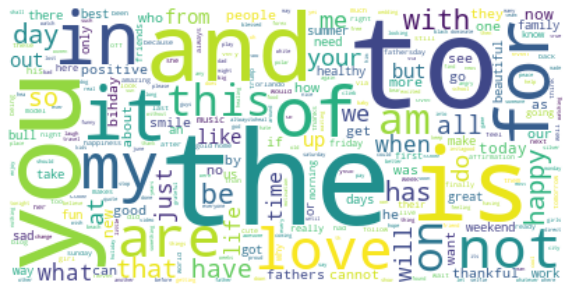

In [119]:
import collections

words = []
for line in combine_df['tweet']: 
    line_words = line.split()
    words.extend(line_words)
stopwords_set = set(stopwords.words('english'))

wordfreq = collections.Counter(words)
wordcloud = WordCloud(
 background_color='white',
 max_words=2000,
 stopwords=stopwords_set
 ).generate_from_frequencies(wordfreq)
plt.figure(figsize=(10,9))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Мусорные слова упорно не удаляются...

__Задание 5.__
Теперь отобразим облако слов для отзывов, не содержащих токсичных комментариев (combine_df['label'] == 0). 


Здесь уже мусорных слов не видать...

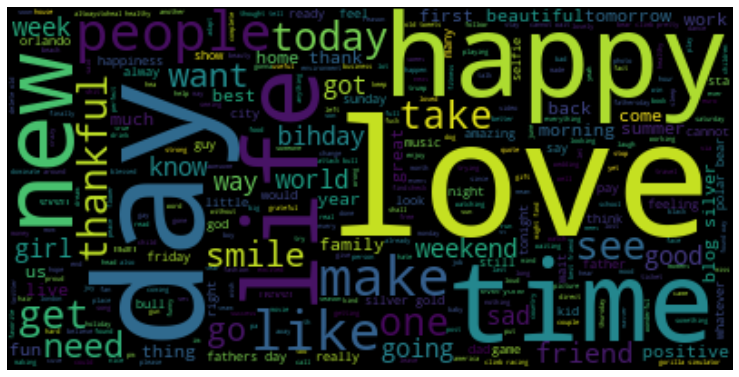

In [122]:
negative = [r for r in combine_df['tweet'][combine_df['label']==0]]
neg = ''.join(negative)
# draw a Word Cloud with word frequencies
stopwords_set = set(stopwords.words('english'))
wordcloud = WordCloud(
    background_color='black',
    max_words=50000,
    stopwords = stopwords_set
   ).generate(neg)
plt.figure(figsize=(13,12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

__Задание 6.__
Теперь отобразим облако слов для отзывов, содержащих токсичные комментарии (combine_df['label'] == 1). 

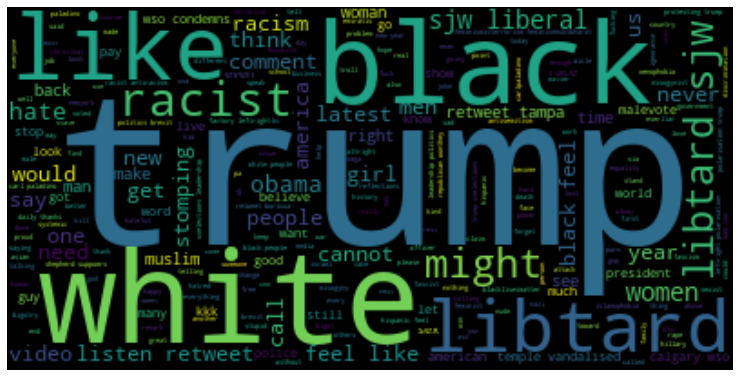

In [121]:
negative = [r for r in combine_df['tweet'][combine_df['label']==1]]
neg = ''.join(negative)
# draw a Word Cloud with word frequencies
stopwords_set = set(stopwords.words('english'))
wordcloud = WordCloud(
    background_color='black',
    max_words=50000,
    stopwords = stopwords_set
   ).generate(neg)
plt.figure(figsize=(13,12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()